In [273]:
import sys
import os
import numpy as np
import pandas as pd
from SALib.analyze import sobol
from SALib.sample import saltelli

sys.path.append('..')

current_dir = os.getcwd()
src_dir = os.path.join(current_dir, '..', 'src')
results_dir = os.path.join(current_dir, '..', 'results')

sys.path.append(src_dir)
sys.path.append(results_dir)

from src.plot import plot_first_and_total_order




In [274]:
data_last_step = pd.read_csv('../results/global_SA_last_step_50i.csv')

In [275]:
problem = {
        'num_vars': 5,
        'names': ['sentence_length', 'interaction_memory', 'risk_aversion_std', 'trading_skill_std', 'tax_per_cop'],
        'bounds': [[5, 90], [10, 100], [0.1, 0.90], [0.1, 0.90], [0.01, 0.1]]
}

param_values = saltelli.sample(problem, 64, calc_second_order=True) # Generate samples (Num of model evaluations) 
len_param_set = len(param_values)


/var/folders/7m/118nvcv149xfxmh2m5xzb83c0000gn/T/ipykernel_1721/2474926313.py:7: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5.1 Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 64, calc_second_order=True) # Generate samples (Num of model evaluations)


In [276]:
# Take the last step of the simulation

data_last_step_500 = data_last_step[data_last_step['Step'] == 500] 

results = pd.DataFrame()  

grouped = data_last_step_500.groupby('iteration')

for i in range(len_param_set):
    # Select the ith row from each group
    ith_rows = grouped.nth(i)
    # Compute the mean of the ith rows
    mean_ith_rows = ith_rows.mean().to_frame().T
    # Append the mean row to the results DataFrame
    results = pd.concat([results, mean_ith_rows], ignore_index=True)

# print(len(results))

In [277]:
# Handling extreme values: Cap the values 
df = pd.DataFrame(results, columns=['total_wealth'])

results['total_wealth_cap'] = df['total_wealth'].clip(lower=-3e150, upper=3e150)


## Total wealth


20x20 grid size, 200 agents and 500 steps

In [278]:
S_i_wealth_last = sobol.analyze(problem, results['total_wealth_cap'].values, print_to_console=True, calc_second_order=True)
# S_i_wealth_last_1.plot()

                          ST   ST_conf
sentence_length     1.160846  0.709043
interaction_memory  1.048507  0.728851
risk_aversion_std   0.786379  0.572984
trading_skill_std   1.198299  0.401910
tax_per_cop         1.310629  0.621197
                          S1   S1_conf
sentence_length     0.155390  0.346893
interaction_memory  0.000061  0.343212
risk_aversion_std   0.110893  0.200619
trading_skill_std  -0.224627  0.549639
tax_per_cop        -0.080456  0.431944
                                               S2   S2_conf
(sentence_length, interaction_memory)    0.041339  0.397691
(sentence_length, risk_aversion_std)    -0.258756  0.309234
(sentence_length, trading_skill_std)    -0.034077  0.862596
(sentence_length, tax_per_cop)          -0.108447  0.720580
(interaction_memory, risk_aversion_std)  0.040846  0.393876
(interaction_memory, trading_skill_std)  0.340419  0.768395
(interaction_memory, tax_per_cop)       -0.108940  0.542919
(risk_aversion_std, trading_skill_std)   0.229587  0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


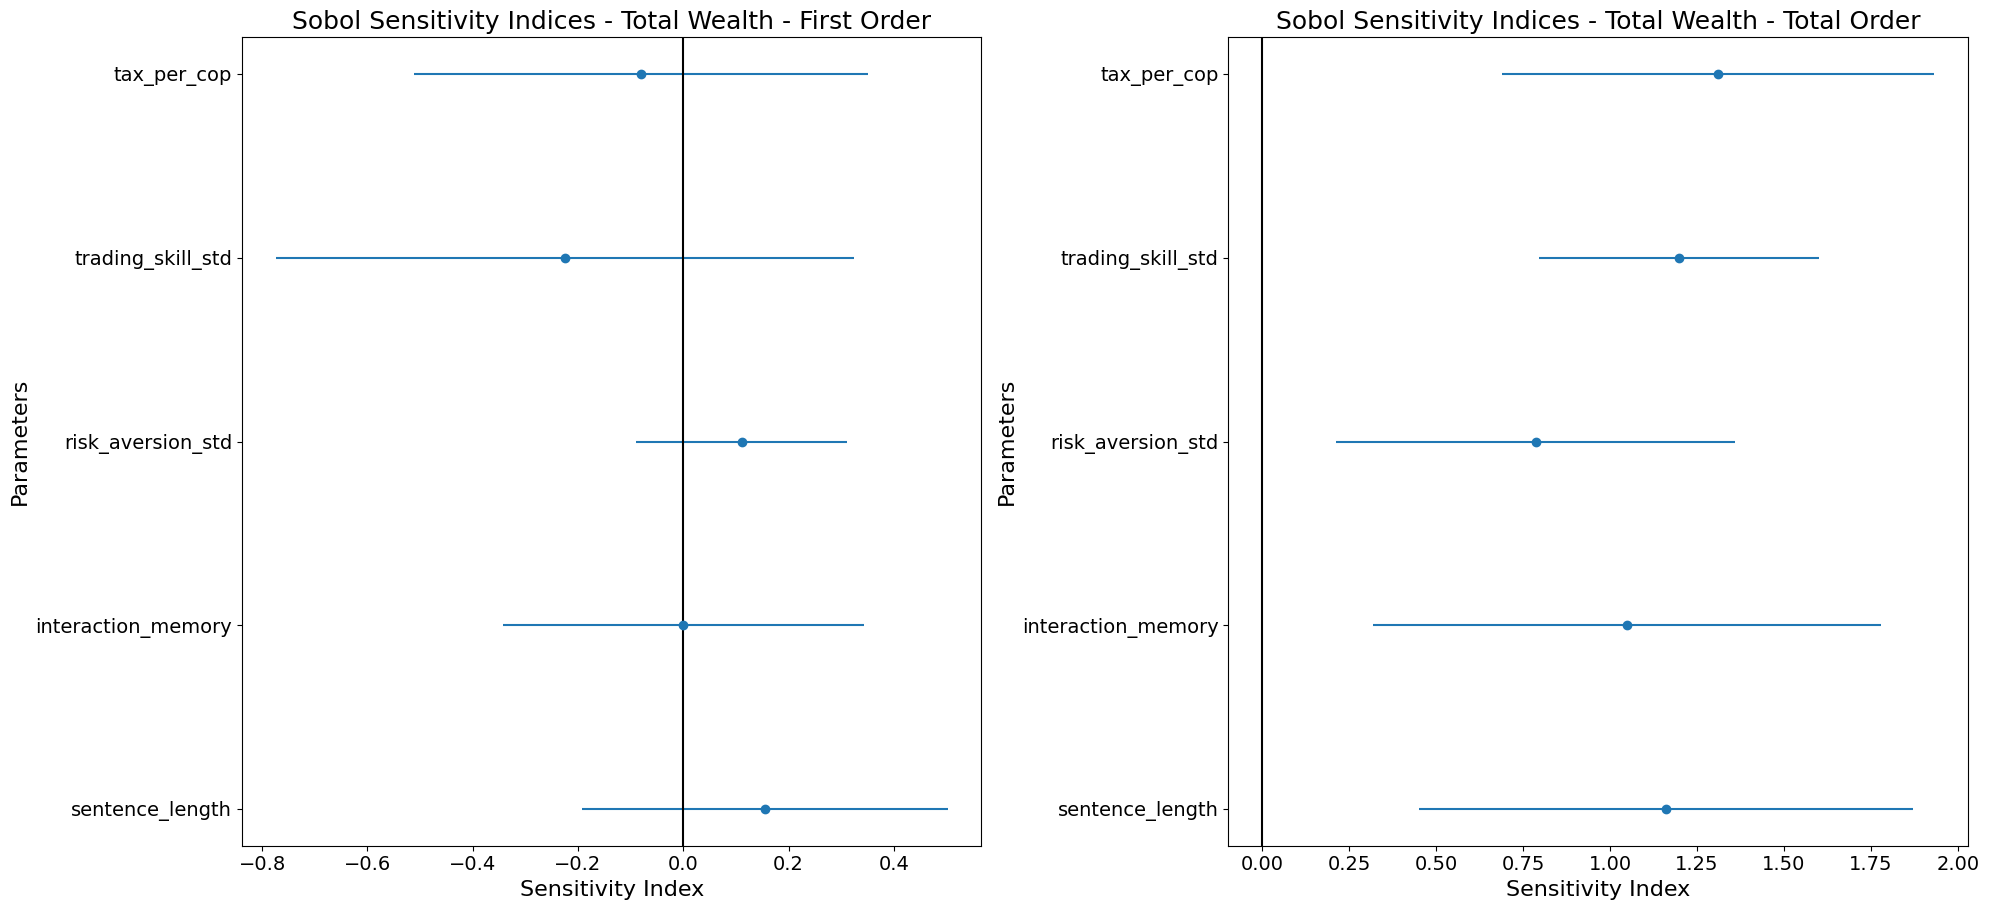

In [279]:
plot_first_and_total_order(S_i_wealth_last, problem['names'], title='Sobol Sensitivity Indices - Total Wealth', title_fontsize=18, label_fontsize=16, tick_fontsize=14)


## Number of cops

In [280]:
S_i_cops_last = sobol.analyze(problem, results['num_cops'].values, print_to_console=True, calc_second_order=True)

                          ST   ST_conf
sentence_length     0.262786  0.162688
interaction_memory  0.151472  0.159235
risk_aversion_std   0.062868  0.027900
trading_skill_std   0.982687  0.319405
tax_per_cop         0.072269  0.042324
                          S1   S1_conf
sentence_length     0.130039  0.208830
interaction_memory  0.067376  0.126797
risk_aversion_std   0.006993  0.091769
trading_skill_std   0.597420  0.276290
tax_per_cop         0.058124  0.094438
                                               S2   S2_conf
(sentence_length, interaction_memory)   -0.042778  0.320293
(sentence_length, risk_aversion_std)    -0.067740  0.288737
(sentence_length, trading_skill_std)     0.232162  0.385498
(sentence_length, tax_per_cop)          -0.023966  0.335049
(interaction_memory, risk_aversion_std) -0.063809  0.159791
(interaction_memory, trading_skill_std) -0.049907  0.188881
(interaction_memory, tax_per_cop)       -0.068752  0.167442
(risk_aversion_std, trading_skill_std)  -0.108009  0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


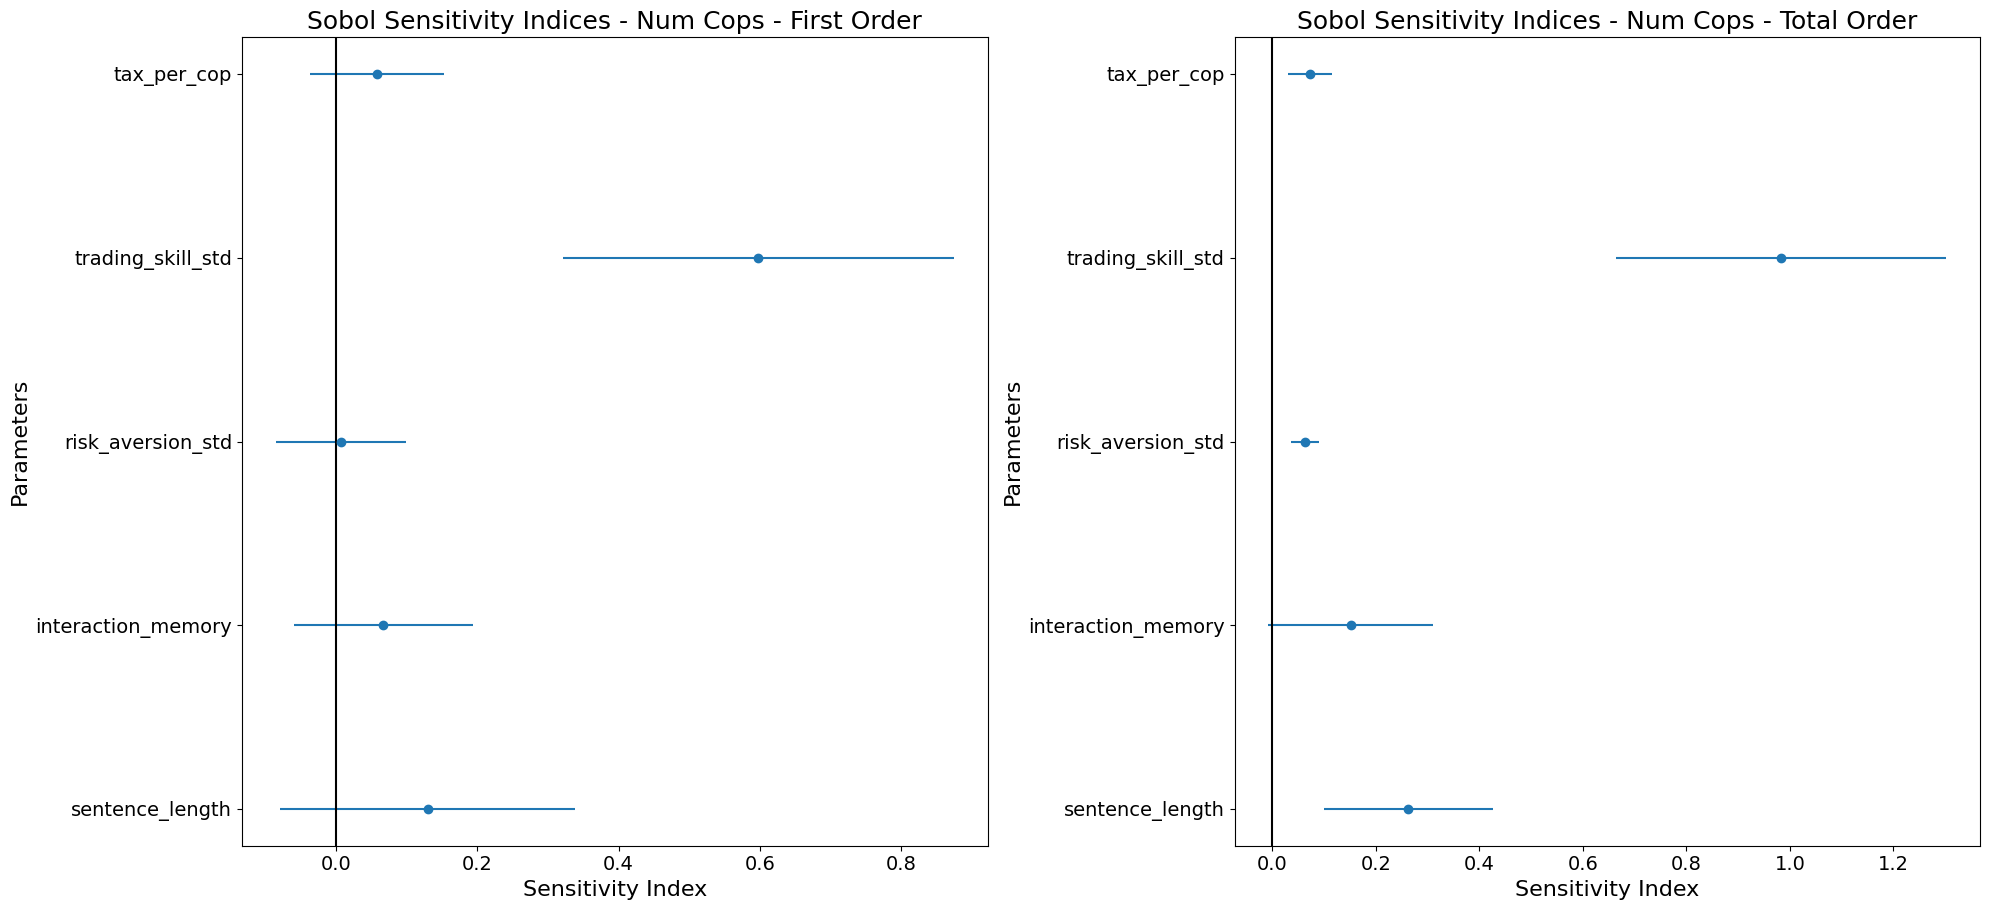

In [281]:
plot_first_and_total_order(S_i_cops_last, problem['names'], title='Sobol Sensitivity Indices - Num Cops', title_fontsize=18, label_fontsize=16, tick_fontsize=14)

## Number of crimes

In [282]:
S_i_crimes_last= sobol.analyze(problem, results['num_crimes_committed'].values, print_to_console=True, calc_second_order=True)


                          ST   ST_conf
sentence_length     0.264360  0.100913
interaction_memory  0.241425  0.104608
risk_aversion_std   0.020835  0.013801
trading_skill_std   0.609528  0.255245
tax_per_cop         0.031290  0.028158
                          S1   S1_conf
sentence_length     0.149980  0.186928
interaction_memory  0.145061  0.158682
risk_aversion_std   0.012873  0.046731
trading_skill_std   0.426725  0.292816
tax_per_cop         0.028510  0.053657
                                               S2   S2_conf
(sentence_length, interaction_memory)   -0.127893  0.282991
(sentence_length, risk_aversion_std)    -0.055155  0.309480
(sentence_length, trading_skill_std)     0.069184  0.324706
(sentence_length, tax_per_cop)          -0.060277  0.313042
(interaction_memory, risk_aversion_std)  0.089572  0.189358
(interaction_memory, trading_skill_std)  0.167033  0.330748
(interaction_memory, tax_per_cop)        0.123774  0.184753
(risk_aversion_std, trading_skill_std)  -0.036064  0

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


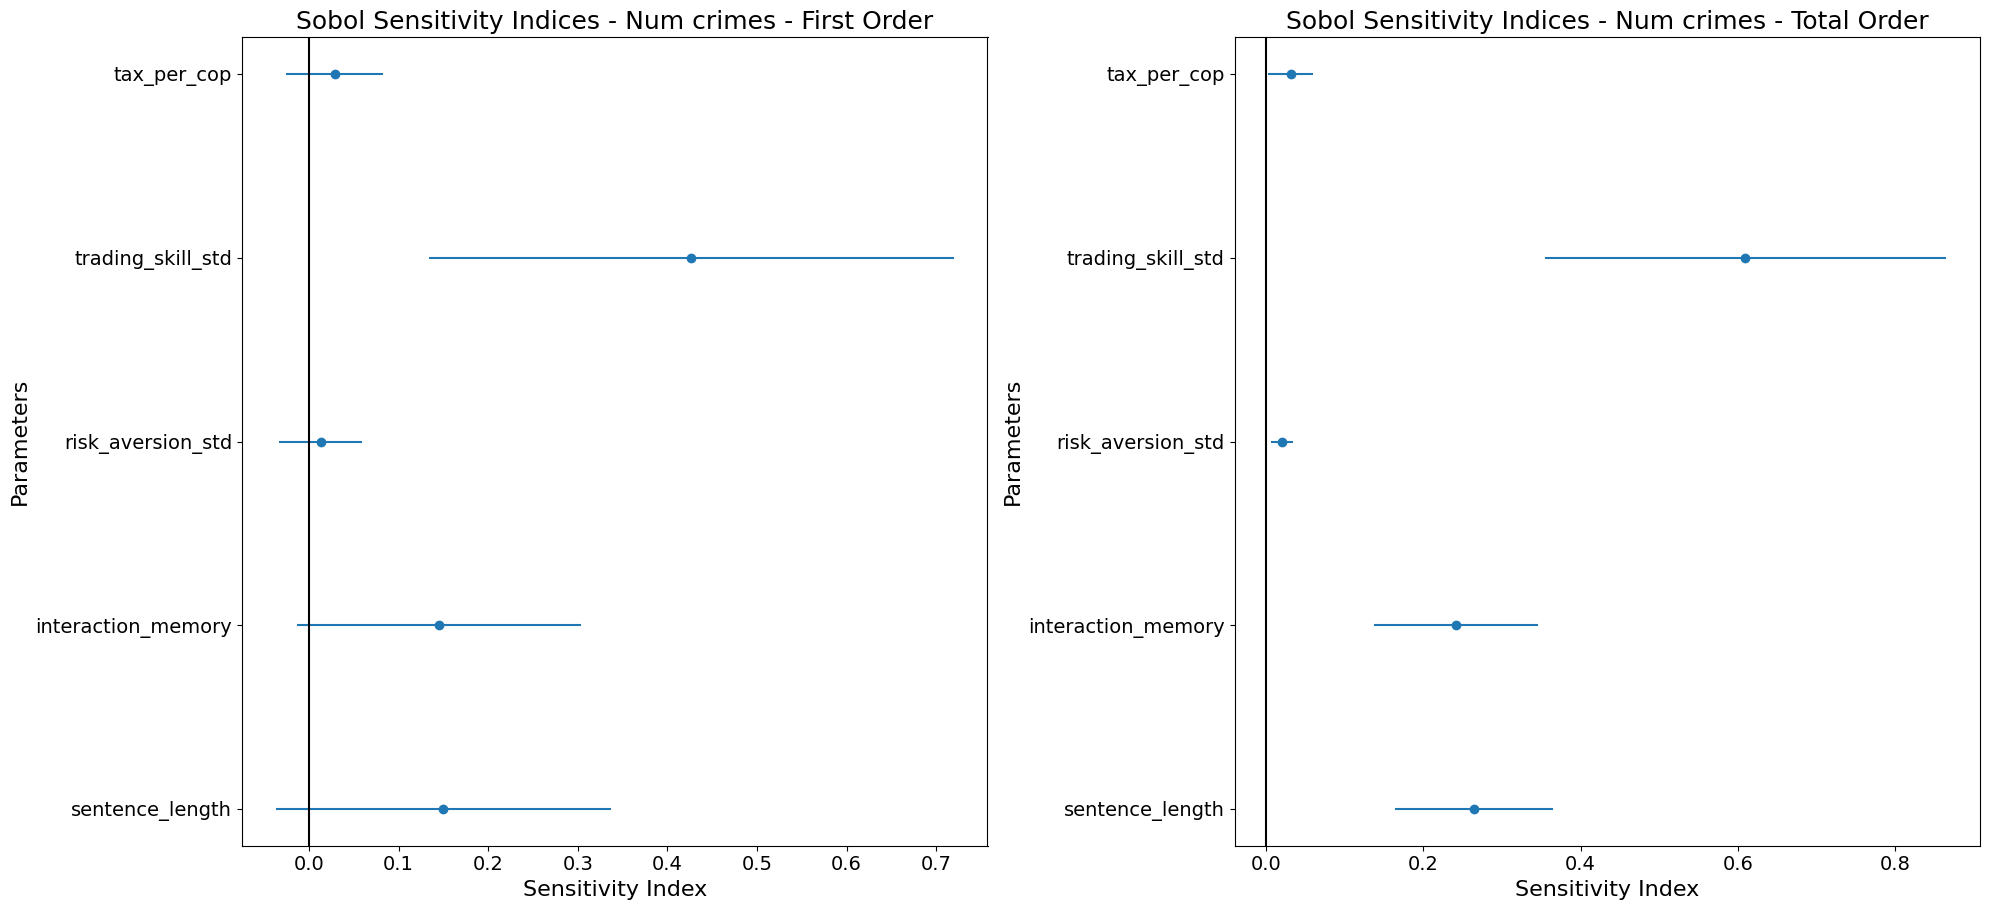

In [283]:
plot_first_and_total_order(S_i_crimes_last, problem['names'], title='Sobol Sensitivity Indices - Num crimes', title_fontsize=18, label_fontsize=16, tick_fontsize=14)


## GINI

In [284]:
# S_i_gini_last_1 = sobol.analyze(problem, data_last_step_1['gini_coeff'].values, print_to_console=True, calc_second_order=True)

In [285]:
# plot_index(S_i_crimes_last_1, problem['names'], '1', 'First order sensitivity')
# plt.title('First order sensitivity - Gini - Last step')
# plt.show()

# # Second order
# plot_index(S_i_crimes_last_1, problem['names'], '2', 'Second order sensitivity')   
# plt.title('Second order sensitivity -Gini coefficiant - Last step') 
# plt.show()
   
# # Total order
# plot_index(S_i_crimes_last_1, problem['names'], 'T', 'Total order sensitivity')
# plt.title('Total order sensitivity - Gini coefficient- Last step')
# plt.show()